In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
data = pd.read_csv('ml_data_variable.csv')

# extract the independent variables (X) and dependent variable (y)
X = data[['COAL, Thousand Short Tons', 'NATURALGAS, Billion Cubic Feet', 'ELECTRICITY, Million Kilowatthours',
         'PETRO_INDUSTRIAL, Thousand Barrels per Day', 'PETRO_RESIDENTIAL_COMMERCIAL, Thousand Barrels per Day',
         'PETRO_TRANSPORTATION_ELECTRICPOWER, Thousand Barrels per Day']]
y = data['CO2, Million Metric Tons']

# add a constant term to the independent variables
X = sm.add_constant(X)

# fit the linear regression model
model = sm.OLS(y, X).fit()

# print the model summary
print(model.summary())


                               OLS Regression Results                               
Dep. Variable:     CO2, Million Metric Tons   R-squared:                       0.967
Model:                                  OLS   Adj. R-squared:                  0.967
Method:                       Least Squares   F-statistic:                     2917.
Date:                      Wed, 17 May 2023   Prob (F-statistic):               0.00
Time:                              02:16:57   Log-Likelihood:                -2166.0
No. Observations:                       600   AIC:                             4346.
Df Residuals:                           593   BIC:                             4377.
Df Model:                                 6                                         
Covariance Type:                  nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------

Coefficients: [0.00000000e+00 2.45716937e-03 5.39019798e-02 2.36033942e-05
 1.83332957e-02 3.13563194e-02 1.63704045e-02]
Intercept: 40.654121646328406
R² (Training): 0.9641068577506697
###########################################################################
R² (y_test, y_pred): 0.9733761375965382
Mean Absolute Error: 6.706380547789473
Mean Squared Error: 71.22296951717811
Root Mean Squared Error: 8.439370208562847


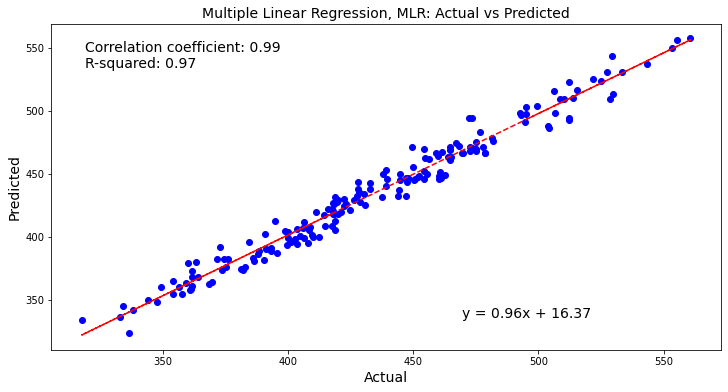

In [3]:

from sklearn.utils import shuffle

# Shuffle data
X, y = shuffle(X, y, random_state = 42)
# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Check the shape of the training and testing sets
#print('X_train shape:', X_train.shape)
#print('y_train shape:', y_train.shape)
#print('X_test shape:', X_test.shape)
#print('y_test shape:', y_test.shape)

# Create an instance of the LinearRegression class
reg = LinearRegression()

# Fit the linear regression model to the training data
reg.fit(X_train, y_train)

print('Coefficients:', reg.coef_)
print('Intercept:', reg.intercept_)


# Make predictions on the training data
y_pred_train = reg.predict(X_train)

# Calculate the R-squared score for the training data
r2_train = r2_score(y_train, y_pred_train)
print("R² (Training):", r2_train)


print('###########################################################################')


# Use the predict method to make predictions on the testing data
y_pred = reg.predict(X_test)



# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the evaluation metrics
print("R² (y_test, y_pred):", r2)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)


# Calculate statistical parameters
correlation = np.corrcoef(y_test, y_pred)[0, 1]
r_squared = np.square(correlation)


# Perform linear regression to get the line equation
slope, intercept = np.polyfit(y_test, y_pred, 1)

# Add the equation as text on the plot
equation = f'y = {slope:.2f}x + {intercept:.2f}'



# Fit a linear regression line
trendline = np.polyfit(y_test, y_pred, 1)
trendline_fn = np.poly1d(trendline)

plt.figure(figsize=(12, 6))  # Specify the width and height in inches

# Plot Actual vs Predicted values with trend line
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, trendline_fn(y_test), color='red', linestyle='--')
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted', fontsize=14)
plt.title('Multiple Linear Regression, MLR: Actual vs Predicted', fontsize=14)

# Annotate statistical parameters on the plot
textstr = f'Correlation coefficient: {correlation:.2f}\nR-squared: {r_squared:.2f}'
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, verticalalignment='top', fontsize=14)

plt.text(0.6, 0.2, equation, transform=plt.gcf().transFigure, fontsize=14)


plt.show()


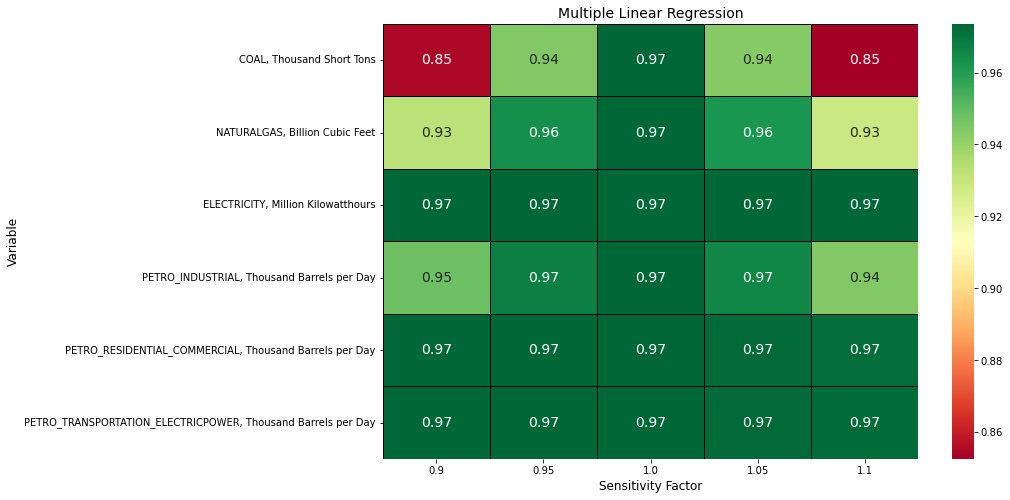

In [4]:
# Define the variables to analyze for sensitivity
variables_to_analyze = ['COAL, Thousand Short Tons', 'NATURALGAS, Billion Cubic Feet', 'ELECTRICITY, Million Kilowatthours',
                        'PETRO_INDUSTRIAL, Thousand Barrels per Day', 'PETRO_RESIDENTIAL_COMMERCIAL, Thousand Barrels per Day',
                        'PETRO_TRANSPORTATION_ELECTRICPOWER, Thousand Barrels per Day']

# Initialize a dictionary to store sensitivity analysis results
sensitivity_results = {}

# Iterate over the variables for sensitivity analysis
for variable_name in variables_to_analyze:
    # Get the original values of the selected variable
    original_values = X_test[variable_name].copy()

    # Initialize a list to store sensitivity analysis results for the current variable
    variable_sensitivity_results = []

    # Iterate over different sensitivities (e.g., increase by 10%)
    for sensitivity in [0.9, 0.95, 1.0, 1.05, 1.1]:
        # Modify the values of the selected variable
        modified_values = original_values * sensitivity
        X_test_modified = X_test.copy()
        X_test_modified[variable_name] = modified_values

        # Make predictions using the modified dataset
        y_pred_modified = reg.predict(X_test_modified)

        # Calculate the R-squared score for the modified predictions
        r2_modified = r2_score(y_test, y_pred_modified)

        # Store the sensitivity analysis results
        variable_sensitivity_results.append(r2_modified)

    # Store the sensitivity analysis results for the current variable in the dictionary
    sensitivity_results[variable_name] = variable_sensitivity_results

# Create a matrix of sensitivity analysis results
sensitivity_matrix = np.array([sensitivity_results[variable] for variable in variables_to_analyze])

# Create a heatmap to visualize the sensitivity analysis results
plt.figure(figsize=(12, 8))  # Adjust the figure size if needed

sns.heatmap(sensitivity_matrix, cmap='RdYlGn', annot=True, fmt='.2f', annot_kws={'fontsize': 14},
            xticklabels=[0.9, 0.95, 1.0, 1.05, 1.1], yticklabels=variables_to_analyze,
            linewidths=0.5, linecolor='black')

plt.xlabel('Sensitivity Factor', fontsize=12)
plt.ylabel('Variable', fontsize=12)
plt.title('Multiple Linear Regression', fontsize=14)
'Sensitivity Analysis of different machine learning methods: Changes in the R² when the selected variable is perturbed'
plt.show()
